<a href="https://colab.research.google.com/github/JUANESPG29/ModeladoySimulacion/blob/main/PROYECTO_FINAL_MyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

###MODELO:

\begin{aligned} \left\{ \begin{array}{l} \dot{S} = - \frac{S}{N}\left( {{\beta _1}{I_1} + {\beta _2}{I_2} + \chi E} \right) + {\rho _1}Q - {\rho _2}S + \alpha R\\ \dot{ E} = \frac{S}{N}\left( {{\beta _1}{I_1} + {\beta _2}{I_2} + \chi E} \right) - {\theta _1}E - {\theta _2}E\\ {\dot{I}}_1 = {\theta _1}E - {\gamma _1}{I_1}\\ \dot{I}_2 = {\theta _2}E - {\gamma _2}{I_2} - \varphi {I_2} + \lambda \left( \varLambda + Q \right) \\ \dot{R} = {\gamma _1}{I_1} + {\gamma _2}{I_2} + \phi H - \alpha R\\ \dot{H} = \varphi {I_2} - \phi H\\ \dot{Q} = \varLambda + {\rho _2}S - \lambda \left( {\varLambda + Q} \right) - {\rho _1}Q \end{array} \right. , \end{aligned}

##Variables del sistema:
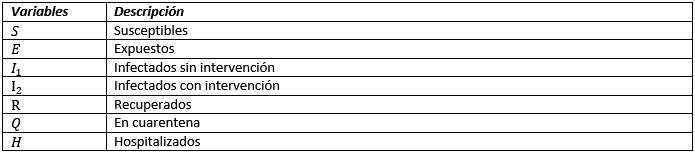

###Parámetros del sistema:
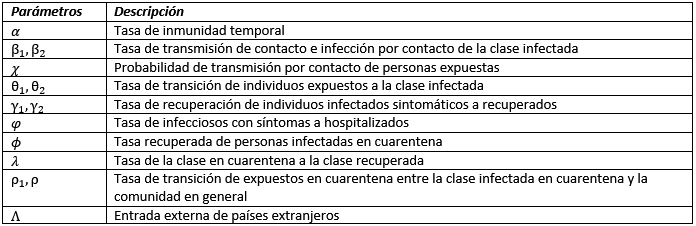

In [30]:
##Parámetros estimados con el algoritmo PSO

beta_1 = 1.0538e-1
beta_2 = 1.0538e-1
X = 1.6221e-1
rho_1 = 2.8133e-3
rho_2 = 1.2668e-1
theta_1 = 9.5e-4 
theta_2 = 3.5412e-2
gamma_1 = 8.5e-3
gamma_2 = 1.0037e-3
lambda_ = 9.4522e-2 
alpha = 1.2048e-4
varlambda = 100
varphi = 0.2910
phi = 0.0107

In [31]:
##Sistema de ecuaciones

def Modelo_SEIR(t,y,N,parameters):

  alpha, beta_1, beta_2, ji, theta_1, theta_2, gamma_1, gamma_2, varphi, phi, lambda_, rho_1, rho_2, varlambda = parameters
  S,E,I1,I2,R,H,Q = y
  S_dot = -(S/N)*(beta_1*I1 + beta_2 * I2 + X*E) + rho_1*Q - rho_2*S + alpha*R
  E_dot = (S/N)*(beta_1*I1 + beta_2 * I2 + X*E) - theta_1*E - theta_2*E
  I1_dot = theta_1*E - gamma_1*I1
  I2_dot = theta_2*E - gamma_2*I2 - varphi*I2 + lambda_ * (varlambda + Q)
  R_dot = gamma_1*I1 + gamma_2*I2 + phi*H - alpha*R
  H_dot = phi*I2 - phi*H
  Q_dot = varlambda + rho_2*S - lambda_ * (varlambda+Q) - rho_1*Q

  return S_dot, E_dot, I1_dot, I2_dot, R_dot, H_dot, Q_dot
  
var_names = ['Susceptibles','Expuestos','Infectados sin intervención','Infectados con intervención','Recuperados','Hospitalizados','Cuarentena']

In [32]:
##Condiciones iniciales del sistema

N=6.5563e4

parameters = [1.2048e-4, 1.0538e-1, 1.0538e-1, 1.6221e-1, 9.5e-4, 3.5412e-2, 8.5e-3, 1.0037e-3, 0.0973, 0.0416, 9.4522e-2, 2.8133e-3, 1.2668e-1, 0]

y0 = [N,5007,7,729,658,32,4711] 
t_span = [0,200]
t = np.arange(0,200,1)
yt = solve_ivp(Modelo_SEIR,t_span,y0,args=(N,parameters),t_eval=t)

###EVOLUCIÓN DEL SISTEMA

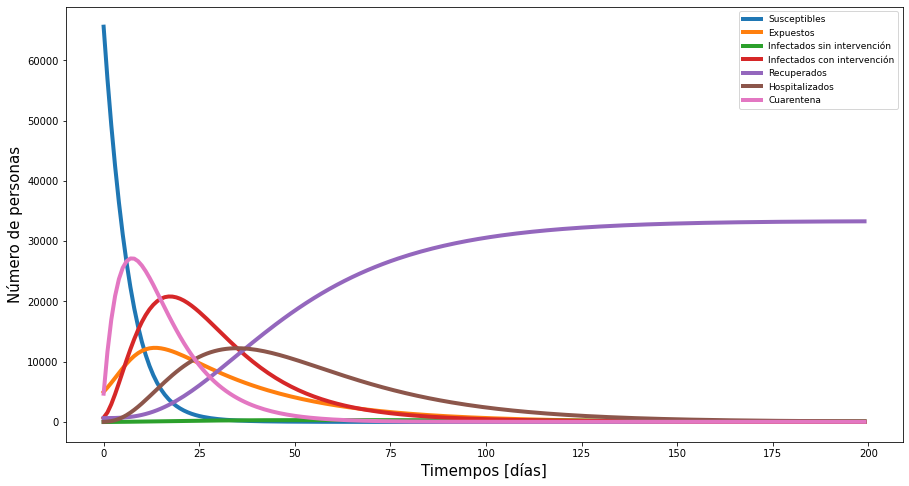

In [33]:
##Gráfica de la evolución del sistema

plt.figure(figsize=(15,8))
for i in range(yt.y.shape[0]):
  plt.plot(yt.t,yt.y[i],label=var_names[i],linewidth=4)
plt.legend(fontsize=9)
plt.xlabel("Timempos [días]",fontsize=15)
plt.ylabel("Número de personas",fontsize=15)
plt.show()

### Caso 1: 
El parámetro $\beta_1$ contiene estacionalidad e infección estocástica, y las tres tazas de contacto e infección se definen como:

$\beta_2 = 30.03, \chi = 30.40$


$\beta_1(t) = \beta_0(1 + \varepsilon_1 \sin(2\pi t) + \varepsilon_2 \xi(t)$

donde $\beta_0 = 2 \times \beta_1 = 60$, $\varepsilon_1$ y $\varepsilon_2$ son grados de infección estacional y estocástica respectivamente. $\langle \xi(t) \rangle$ es ruido blanco gausiano, el cual tiene las propiedadees de $\langle \xi(t) \rangle = 0$ y $\langle \xi(t), \xi(\tau) \rangle = \delta(t - \tau)$


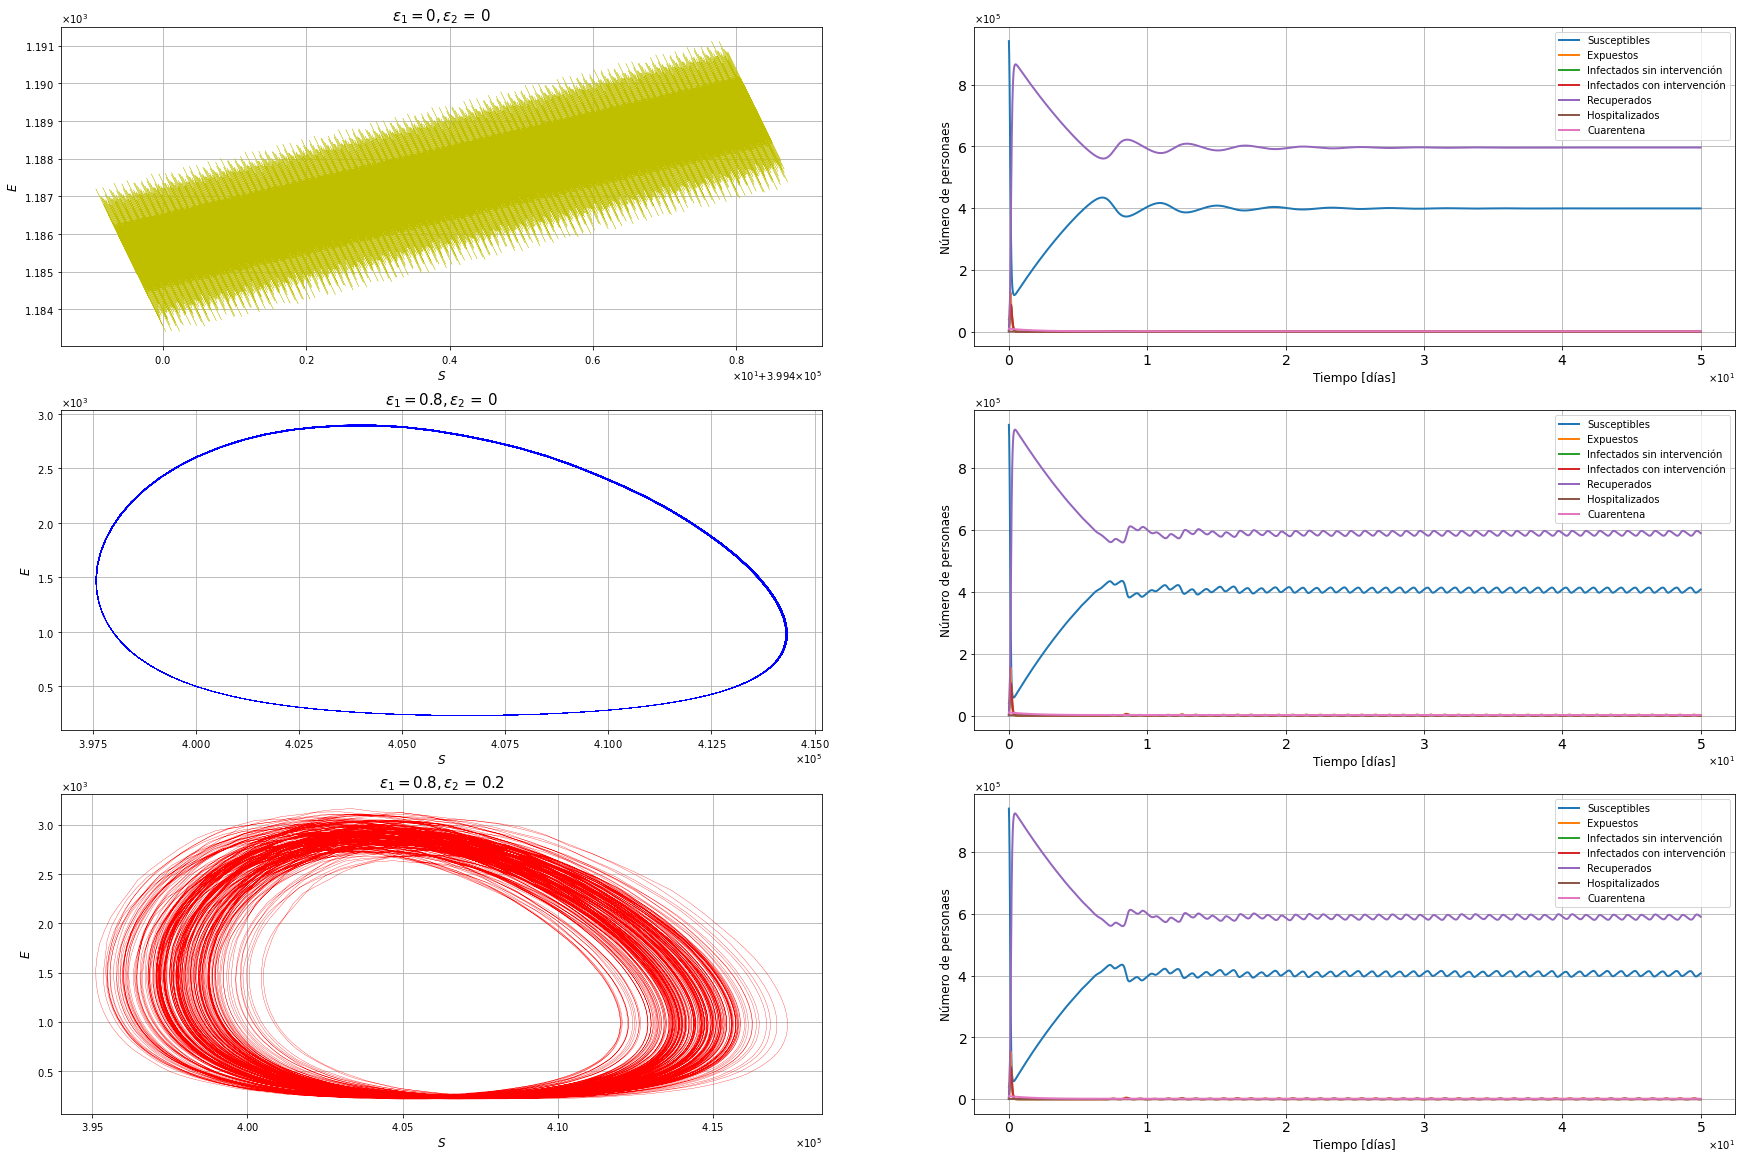

In [34]:
## Casos de parámetros diferentes

N=1e6

parameters_a = [0.08, 30, 30.03, 30.40, 20.054, 20.12, 26, 26, 
                0.00009, 0.8, 0.4, 1/14, 0.002, 10]

parameters_b = [1.2048e-4 , 1.0538e-1, 1.0538e-1, 1.6221e-1, 9.5e-4, 3.5412e-2, 8.5e-3, 
                1.0037e-3, 0.2910, 0.0107, 9.4522e-2, 2.8133e-3, 1.2668e-1, 10]

parameters_c = [1.2048e-4 , 1.0538e-1, 1.0538e-1, 1.6221e-1, 9.5e-4, 3.5412e-2, 8.5e-3, 
                1.0037e-3, 0.0973, 0.0416, 9.4522e-2, 2.8133e-3, 1.2668e-1, 10]

def Modelo_SEIR_1(t,y,N,parameters):

  alpha, beta_1, beta_2, X, theta_1, theta_2, gamma_1, gamma_2, varphi, phi, lambda_, rho_1, rho_2, varlambda = parameters
  S,E,I1,I2,R,H,Q = y

  X = 30.40
  beta_1 = 60*(1+E1*np.sin(2*np.pi*t) + E2*np.random.normal(0,0.1))
  beta_2 = 30.03

  S_dot = -(S/N)*(beta_1*I1 + beta_2 * I2 + X*E) + rho_1*Q - rho_2*S + alpha*R
  E_dot = (S/N)*(beta_1*I1 + beta_2 * I2 + X*E) - theta_1*E - theta_2*E
  I1_dot = theta_1*E - gamma_1*I1
  I2_dot = theta_2*E - gamma_2*I2 - varphi*I2 + lambda_ * (varlambda + Q)
  R_dot = gamma_1*I1 + gamma_2*I2 + phi*H - alpha*R
  H_dot = varphi*I2 - phi*H
  Q_dot = varlambda + rho_2*S - lambda_ * (varlambda+Q) - rho_1*Q

  return S_dot, E_dot, I1_dot, I2_dot, R_dot, H_dot, Q_dot


# y0 = [94076,4007,0,0,0,0,0] 
y0 = [94076,4007,262,524,31,100,1000] 
y0 = np.multiply(y0,10)
tf = 1000
t_span = [0,tf]
t = np.linspace(0,tf,int(1e5))
i = 0
j = 0
plt.figure(figsize = (30,20))
for E1, E2, color in ([0,0,'y'], [0.8, 0, 'b'], [0.8, 0.2, 'r']):
    i += 1
    j += 1
    yt = solve_ivp(Modelo_SEIR_1,t_span,y0,args=(N,parameters_a),t_eval=t)
    
    plt.subplot(3, 2, i)
    plt.plot(yt.y[0][-20000:], yt.y[1][-20000:], lw=0.3, color = color)
    plt.xlabel("$S$", fontsize = 12)
    plt.ylabel("$E$", fontsize = 12)
    plt.title(f"$\epsilon_1 = {E1}, \epsilon_2$ = {E2}",fontsize = 15)
    plt.grid('on')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.ticklabel_format(style='scientific', axis = 'both', scilimits = (0,0),useMathText=True)
    i += 1
    plt.subplot(3,2,i)
    for j in range(yt.y.shape[0]):
        plt.plot(yt.t[:5000],yt.y[j][:5000],label=var_names[j],linewidth=2)
        plt.legend(fontsize=10)
        plt.xlabel("Tiempo [días]",fontsize=12)
        plt.ylabel("Número de personaes",fontsize=12)
        plt.grid('on') 
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)
        plt.ticklabel_format(style='scientific', axis = 'both', scilimits = (0,0),useMathText=True)
plt.show()


### Caso 2

El parámetro $\beta_2$ contiene estacionalidad e infección estocástica, mientras que las otras dos tazas de infección permanecen constantes. Así, los parámetros son definidos como:

$\beta_1 = 30, \chi = 30.40$

$\beta_2(t) = \beta_0(1+\varepsilon_1 \sin(2 \pi t) + \varepsilon_2 \xi(t))$

Donde $\beta_0 = 2 \times \beta_2 = 60$, $\varepsilon_1$ y $\varepsilon_2$ son grados de infección estocástica y estacional respectivamente. 

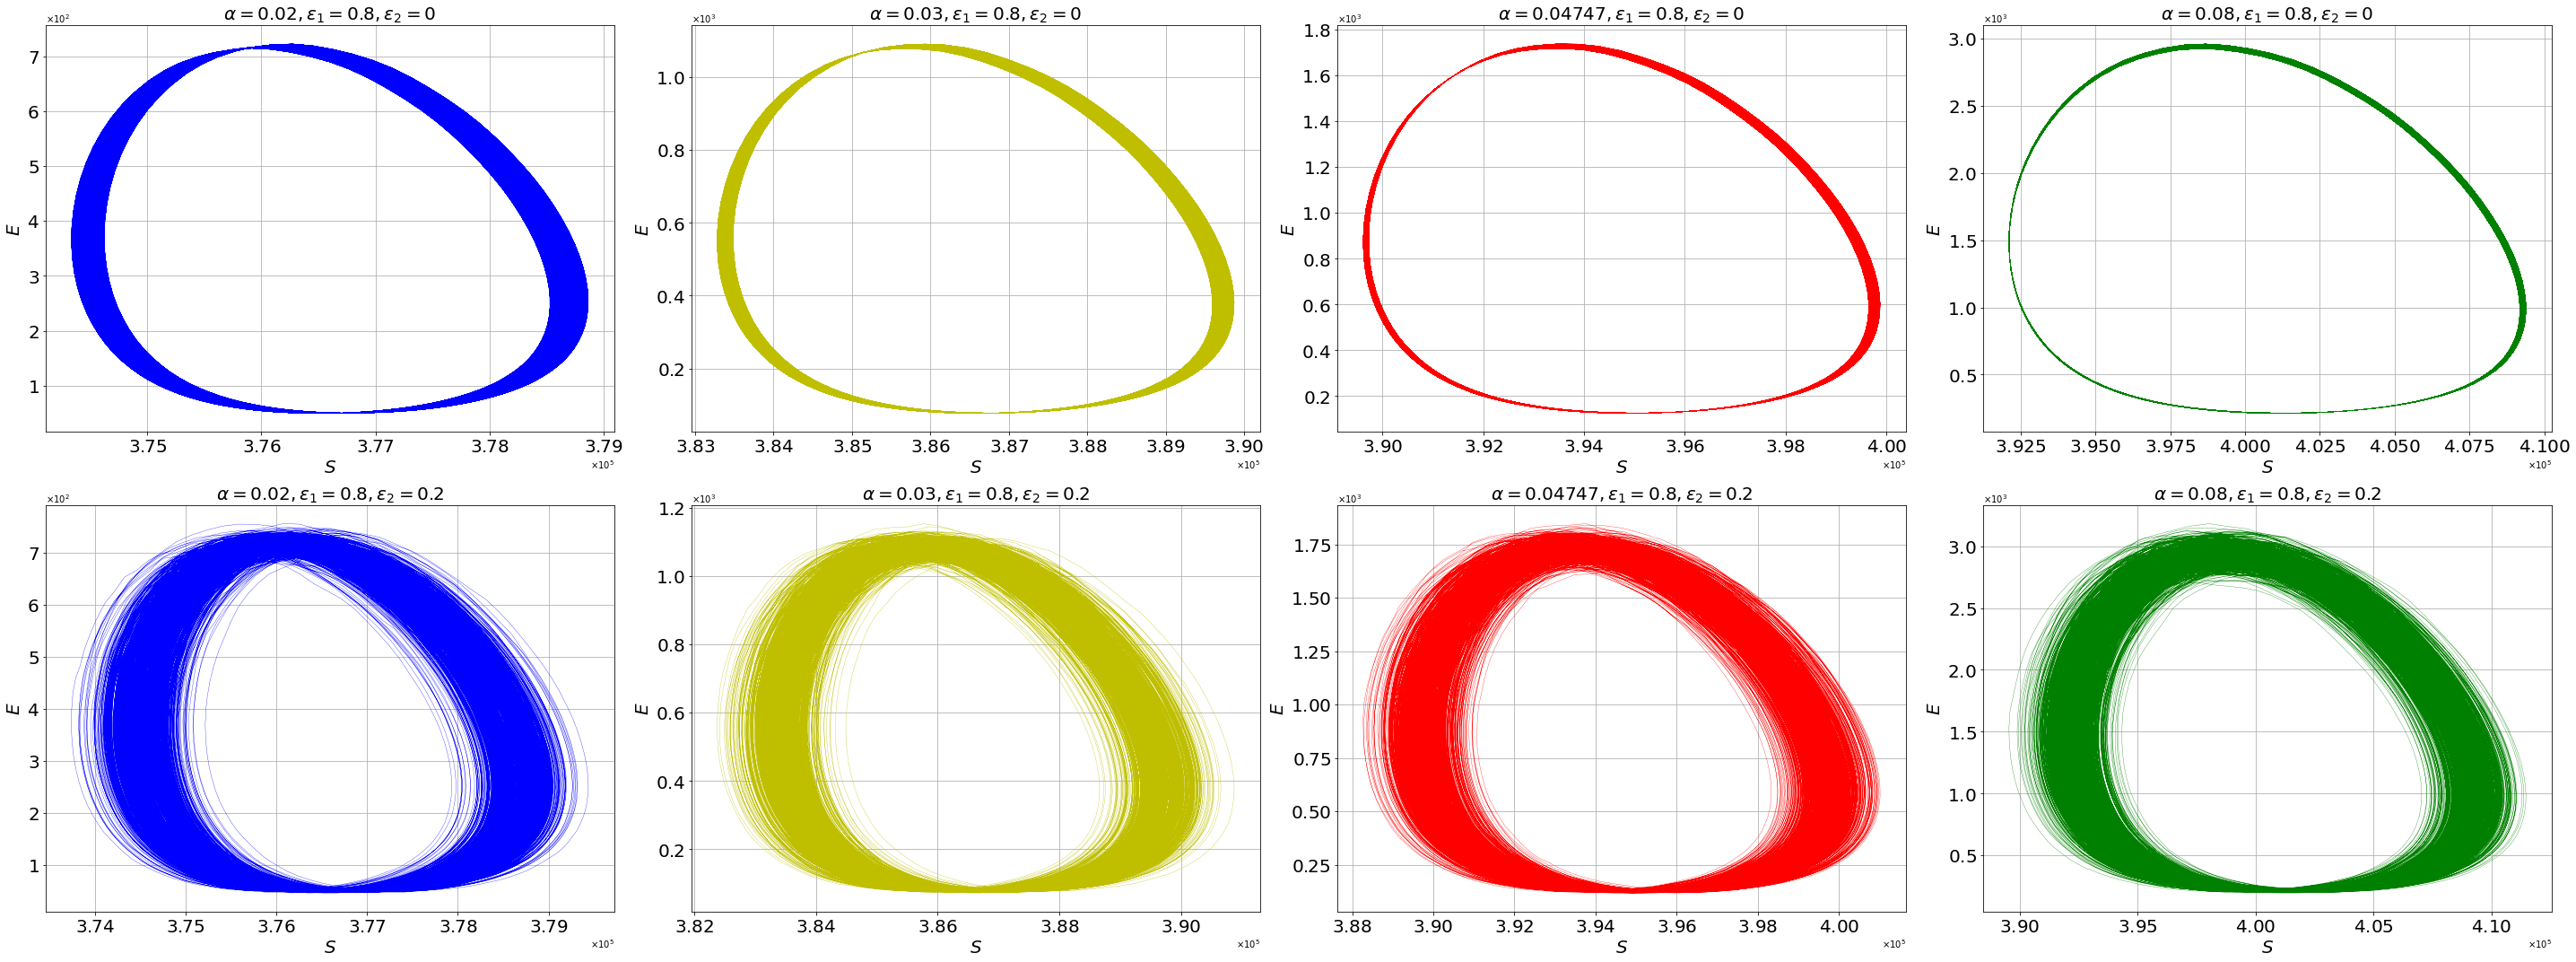

In [35]:
def Modelo_SEIR_2(t,y,N,parameters):

  alpha, beta_1, beta_2, X, theta_1, theta_2, gamma_1, gamma_2, varphi, phi, lambda_, rho_1, rho_2, varlambda = parameters
  S,E,I1,I2,R,H,Q = y

  beta_1 = 30
  X = 30.40
  beta_2 = 60*(1+E1*np.sin(2*np.pi*t) + E2*np.random.normal(0,0.1))

  S_dot = -(S/N)*(beta_1*I1 + beta_2 * I2 + X*E) + rho_1*Q - rho_2*S + alpha*R
  E_dot = (S/N)*(beta_1*I1 + beta_2 * I2 + X*E) - theta_1*E - theta_2*E
  I1_dot = theta_1*E - gamma_1*I1
  I2_dot = theta_2*E - gamma_2*I2 - varphi*I2 + lambda_ * (varlambda + Q)
  R_dot = gamma_1*I1 + gamma_2*I2 + phi*H - alpha*R
  H_dot = varphi*I2 - phi*H
  Q_dot = varlambda + rho_2*S - lambda_ * (varlambda+Q) - rho_1*Q

  return S_dot, E_dot, I1_dot, I2_dot, R_dot, H_dot, Q_dot


y0 = [94076,4007,262,524,31,100,1000] 

y0 = np.multiply(y0,10)
tf = 1000
t_span = [0,tf]
t = np.linspace(0,tf,int(1e5))
i = 0
plt.figure(figsize = (40,15))
for E1, E2 in [[0.8, 0],[0.8, 0.2]]:
    for alpha, color in [[0.02, 'b'],[0.03, 'y'], [0.04747, 'r'], [0.08, 'g']]:
        parameters = [alpha, 30, 30.03, 30.40, 20.054, 20.12, 26, 26, 
                    0.00009, 0.8, 0.4, 1/14, 0.002, 10]
        i += 1
        yt = solve_ivp(Modelo_SEIR_2,t_span,y0,args=(N,parameters),t_eval=t)

        plt.subplot(2, 4, i)
        plt.plot(yt.y[0][-70000:], yt.y[1][-70000:], lw=0.3, color = color)
        plt.xlabel("$S$", fontsize = 20)
        plt.ylabel("$E$", fontsize = 20)
        plt.title(f"$\\alpha = {alpha}, \epsilon_1 = {E1}, \epsilon_2 = {E2}$",fontsize = 20)
        plt.grid('on')
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.ticklabel_format(style='scientific', axis = 'both', scilimits = (0,0), useMathText=True)
        plt.tight_layout()
plt.show()

### Caso 3

El parámetro $\chi_1$ contiene estacionalidad e infección estocástica, y $\beta_1$ y $\beta_2$ son constantes. Como resultado, los parámetros estarían dados por:

$\beta_1 = 30, \beta_2(t) = 30$

$\chi = \chi_0(1 + \varepsilon_1 \sin(2 \pi t) + \varepsilon_2 \xi(t))$

Donde $\beta_0 = 2\chi = 60.8$, $\varepsilon_1$ y $\varepsilon_2$ son grados de infección estocástica y estacional respectivamente.

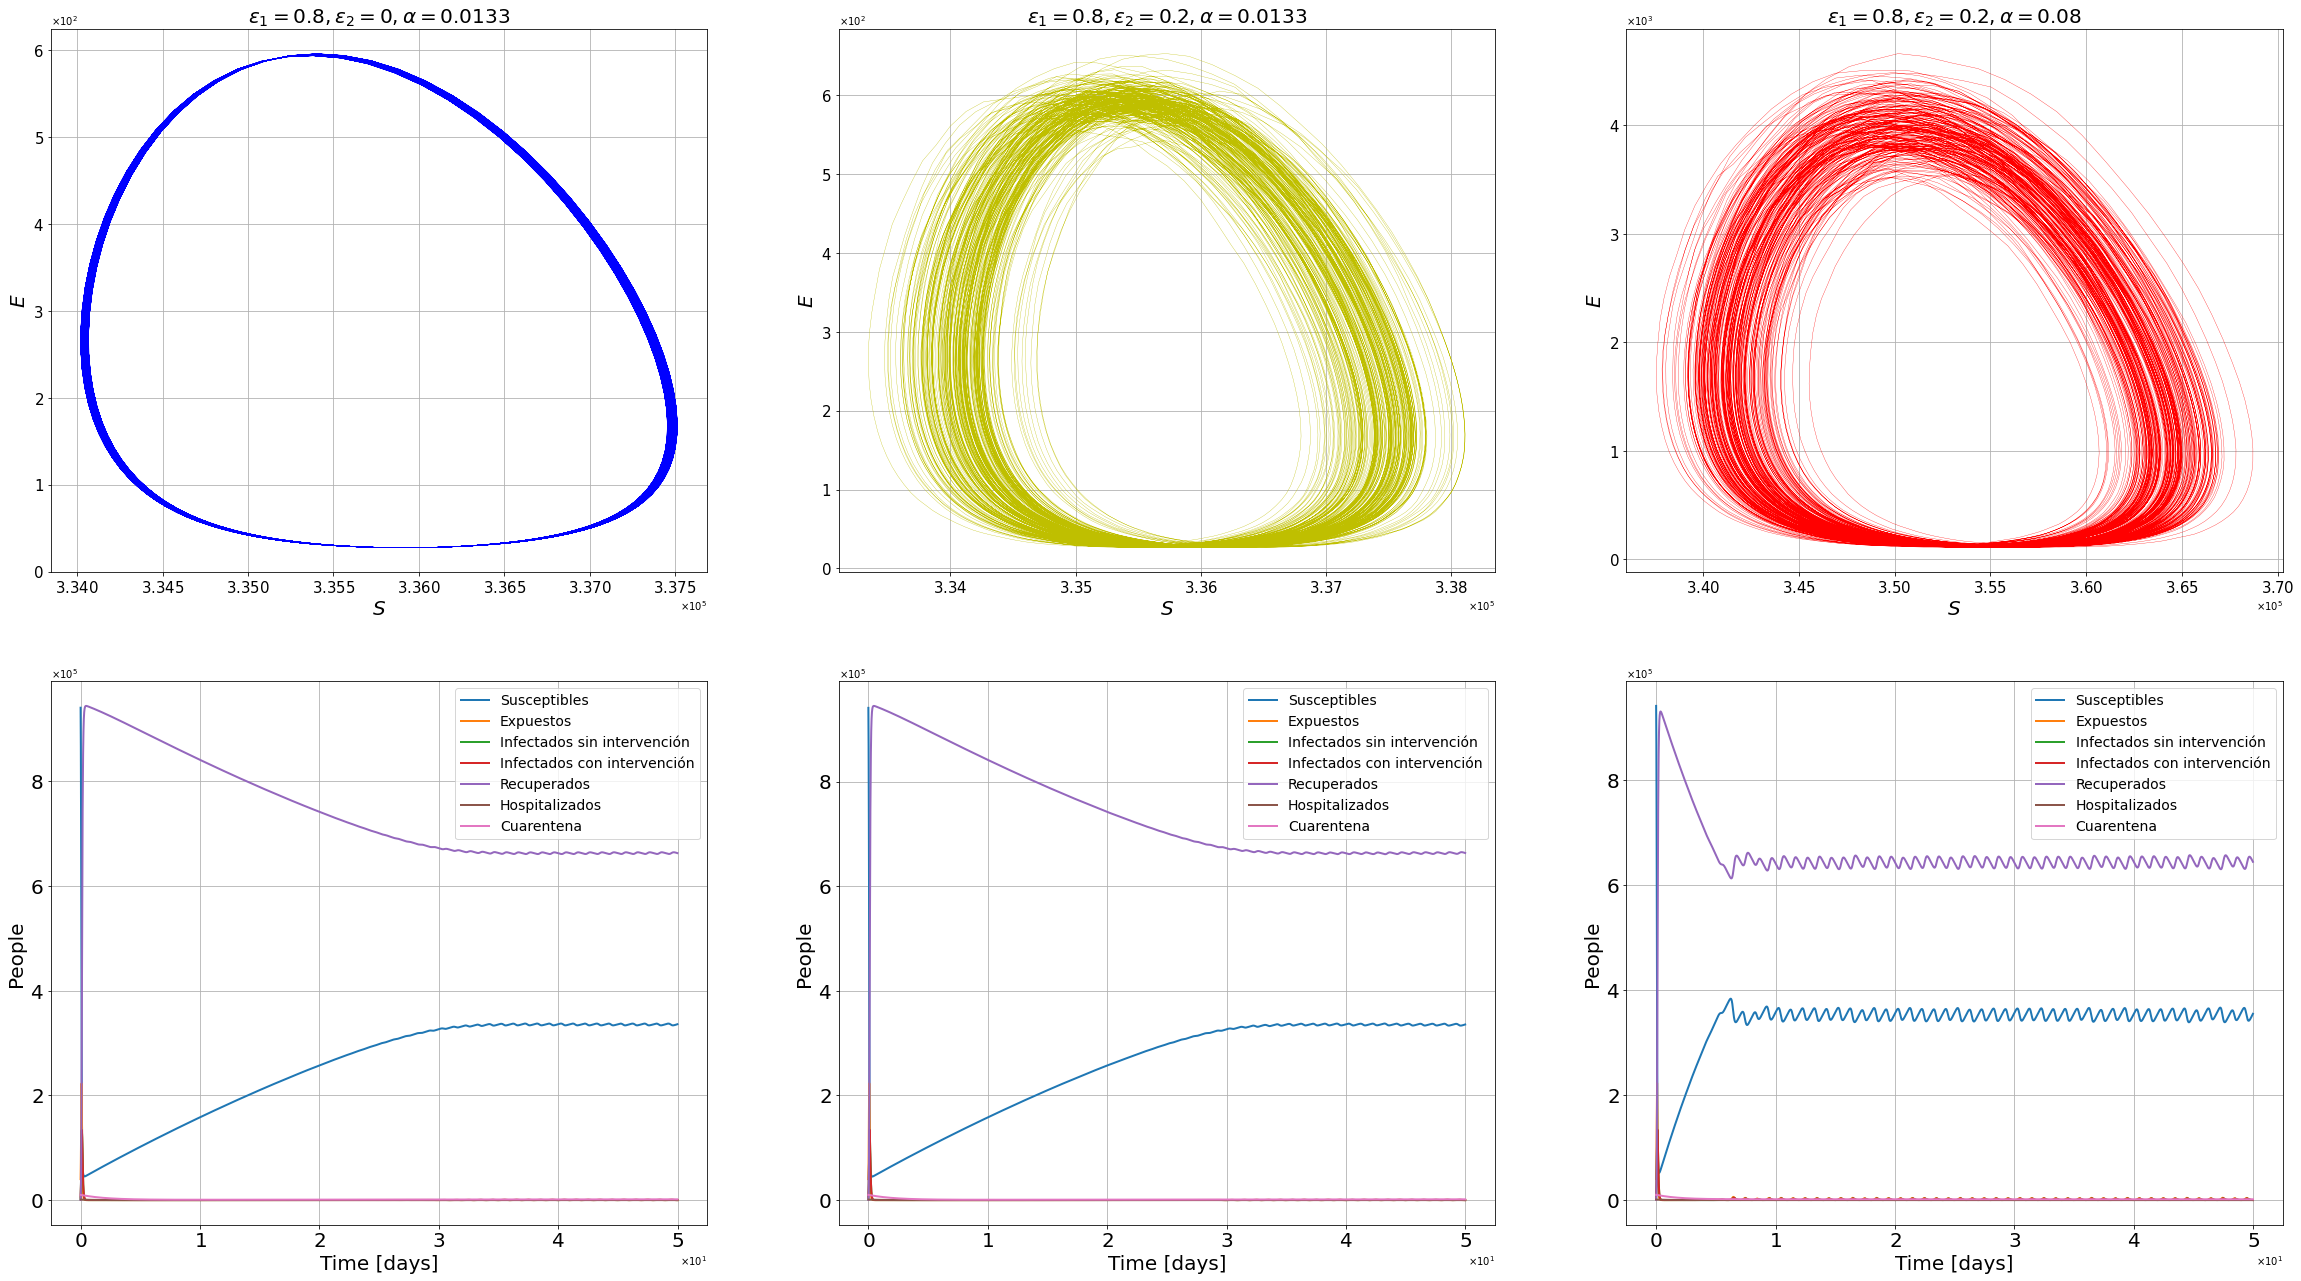

In [36]:
def Modelo_SERI_3(t,y,N,parameters):

  alpha, beta_1, beta_2, X, theta_1, theta_2, gamma_1, gamma_2, varphi, phi, lambda_, rho_1, rho_2, varlambda = parameters
  S,E,I1,I2,R,H,Q = y

  beta_1 = 30
  X = 60.8*(1+E1*np.sin(2*np.pi*t) + E2*np.random.normal(0,0.1))
  beta_2 = 30

  S_dot = -(S/N)*(beta_1*I1 + beta_2 * I2 + X*E) + rho_1*Q - rho_2*S + alpha*R
  E_dot = (S/N)*(beta_1*I1 + beta_2 * I2 + X*E) - theta_1*E - theta_2*E
  I1_dot = theta_1*E - gamma_1*I1
  I2_dot = theta_2*E - gamma_2*I2 - varphi*I2 + lambda_ * (varlambda + Q)
  R_dot = gamma_1*I1 + gamma_2*I2 + phi*H - alpha*R
  H_dot = varphi*I2 - phi*H
  Q_dot = varlambda + rho_2*S - lambda_ * (varlambda+Q) - rho_1*Q

  return S_dot, E_dot, I1_dot, I2_dot, R_dot, H_dot, Q_dot


y0 = [94076,4007,262,524,31,100,1000] 
y0 = np.multiply(y0,10)
tf = 1000
t_span = [0,tf]
t = np.linspace(0,tf,int(1e5))
i = 0
plt.figure(figsize = (40,22))
for E1, E2, alpha, color in ([0.8,0,0.0133,'b'], [0.8, 0.2,0.0133, 'y'], [0.8, 0.2, 0.08, 'r']):
    i += 1
    parameters = [alpha, 30, 30.03, 30.40, 20.054, 20.12, 26, 26, 
                    0.00009, 0.8, 0.4, 1/14, 0.002, 10]
    
    yt = solve_ivp(Modelo_SERI_3,t_span,y0,args=(N,parameters),t_eval=t)
    
    plt.subplot(2, 3, i)
    plt.plot(yt.y[0][-20000:], yt.y[1][-20000:], lw=0.3, color = color)
    plt.xlabel("$S$", fontsize = 20)
    plt.ylabel("$E$", fontsize = 20)
    plt.title(f"$\epsilon_1 = {E1}, \epsilon_2 = {E2}, \\alpha = {alpha}$",fontsize = 20)
    plt.grid('on')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.ticklabel_format(style='scientific', axis = 'both', scilimits = (0,0),useMathText=True)
    
    plt.subplot(2,3,i+3)
    for j in range(yt.y.shape[0]):
        plt.plot(yt.t[:5000],yt.y[j][:5000],label=var_names[j],linewidth=2)
        plt.legend(fontsize=14)
        plt.xlabel("Time [days]",fontsize=20)
        plt.ylabel("People",fontsize=20)
        plt.grid('on') 
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.ticklabel_format(style='scientific', axis = 'both', scilimits = (0,0),useMathText=True)
plt.show()

### Caso 4 

Infección estacional y estocástica con períodos más reales.

$T = 365$

$\omega = \frac{2 \pi}{T}$

$\omega = \frac{2 \pi}{365}$


El parámetro $\chi$ contiene infección estocástica y esatcional, con período de un año y $\beta_1$ y $\beta_2$ son constantes. En este caso, los parámetros estarían dados por:

$\beta_1 = 30, \beta_2(t) = 30$

$\chi = \chi_0(1 + \varepsilon_1 \sin(\frac{2 \pi}{365} t) + \varepsilon_2 \xi(t))$

Donde $\beta_0 = 2\chi = 60.8$, $\varepsilon_1$ y $\varepsilon_2$ son grados de infección estocástica y estacional respectivamente.

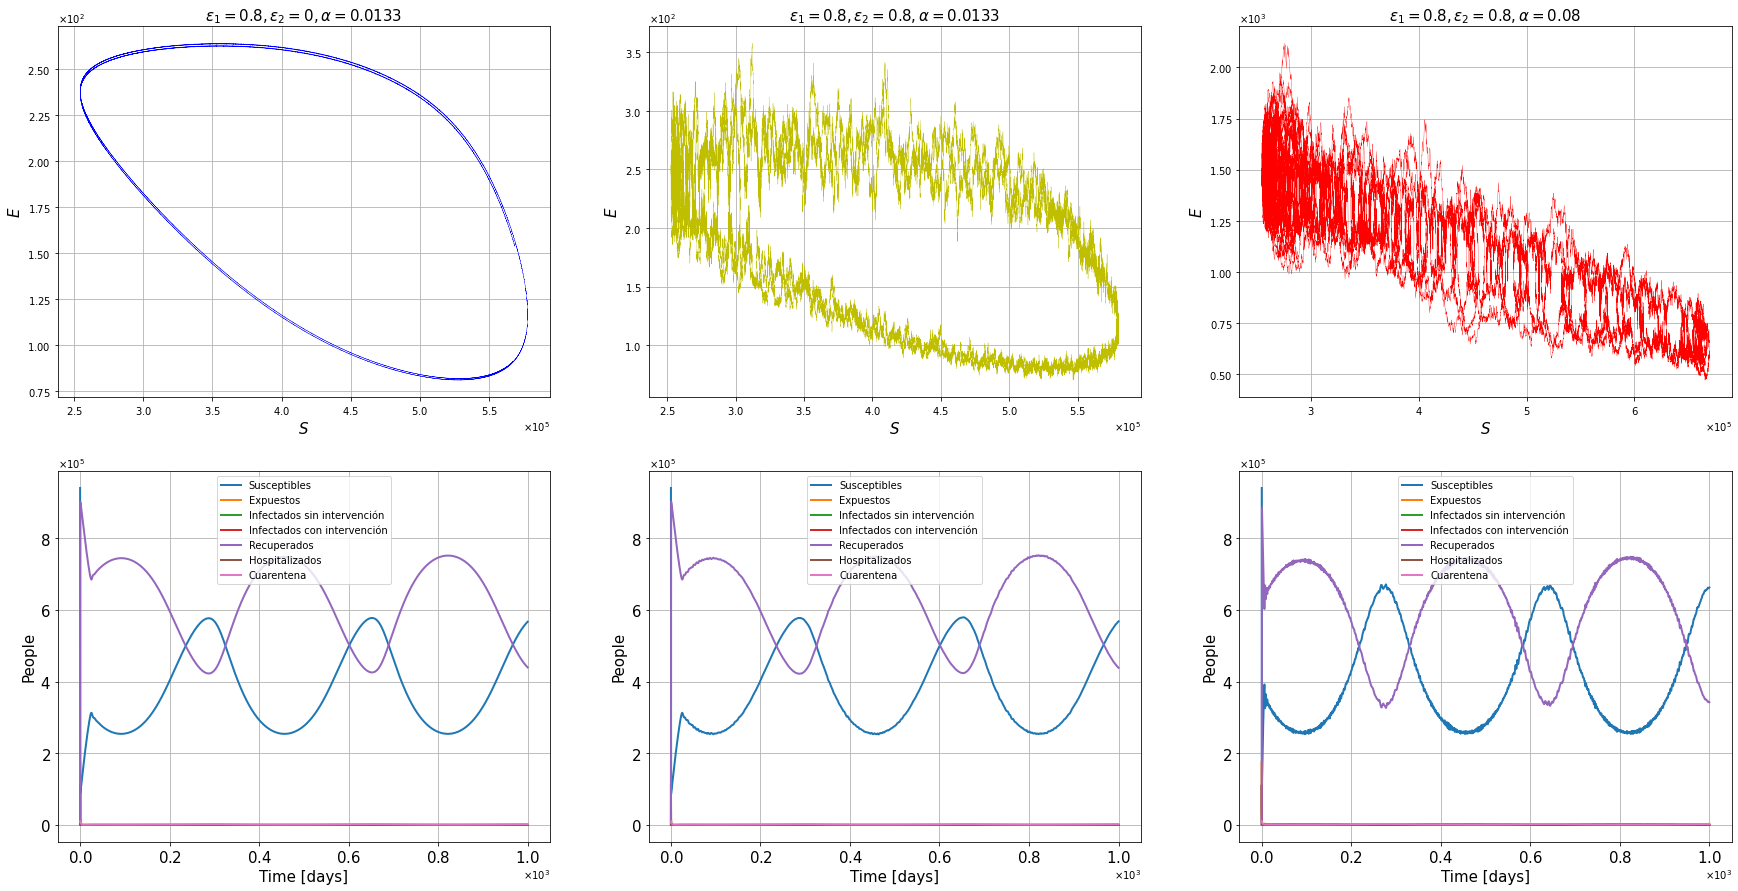

In [37]:
def Modelo_SEIR_4(t,y,N,parameters):

  alpha, beta_1, beta_2, X, theta_1, theta_2, gamma_1, gamma_2, varphi, phi, lambda_, rho_1, rho_2, varlambda = parameters
  S,E,I1,I2,R,H,Q = y

  beta_1 = 30
  X = 60.8*(1+E1*np.sin(2*np.pi*t/365) + E2*np.random.normal(0,0.1))
  beta_2 = 30

  S_dot = -(S/N)*(beta_1*I1 + beta_2 * I2 + X*E) + rho_1*Q - rho_2*S + alpha*R
  E_dot = (S/N)*(beta_1*I1 + beta_2 * I2 + X*E) - theta_1*E - theta_2*E
  I1_dot = theta_1*E - gamma_1*I1
  I2_dot = theta_2*E - gamma_2*I2 - varphi*I2 + lambda_ * (varlambda + Q)
  R_dot = gamma_1*I1 + gamma_2*I2 + phi*H - alpha*R
  H_dot = varphi*I2 - phi*H
  Q_dot = varlambda + rho_2*S - lambda_ * (varlambda+Q) - rho_1*Q

  return S_dot, E_dot, I1_dot, I2_dot, R_dot, H_dot, Q_dot


y0 = [94076,4007,262,524,31,100,1000] 
y0 = np.multiply(y0,10)
tf = 1000
t_span = [0,tf]
t = np.linspace(0,tf,int(1e5))
i = 0
plt.figure(figsize = (30,15))
for E1, E2, alpha, color in ([0.8,0,0.0133,'b'], [0.8, 0.8,0.0133, 'y'], [0.8, 0.8, 0.08, 'r']):
    i += 1
    parameters = [alpha, 30, 30.03, 30.40, 20.054, 20.12, 26, 26, 
                    0.00009, 0.8, 0.4, 1/14, 0.002, 10]
    
    yt = solve_ivp(Modelo_SEIR_4,t_span,y0,args=(N,parameters),t_eval=t)
    
    plt.subplot(2, 3, i)
    plt.plot(yt.y[0][-70000:], yt.y[1][-70000:], lw=0.3, color = color)
    plt.xlabel("$S$", fontsize = 15)
    plt.ylabel("$E$", fontsize = 15)
    plt.title(f"$\epsilon_1 = {E1}, \epsilon_2 = {E2}, \\alpha = {alpha}$",fontsize = 15)
    plt.grid('on')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.ticklabel_format(style='scientific', axis = 'both', scilimits = (0,0),useMathText=True)
    
    plt.subplot(2,3,i+3)
    for j in range(yt.y.shape[0]):
        plt.plot(yt.t,yt.y[j],label=var_names[j],linewidth=2)
        plt.legend(fontsize=10)
        plt.xlabel("Time [days]",fontsize=15)
        plt.ylabel("People",fontsize=15)
        plt.grid('on') 
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.ticklabel_format(style='scientific', axis = 'both', scilimits = (0,0),useMathText=True)
plt.show()